230
(230,)


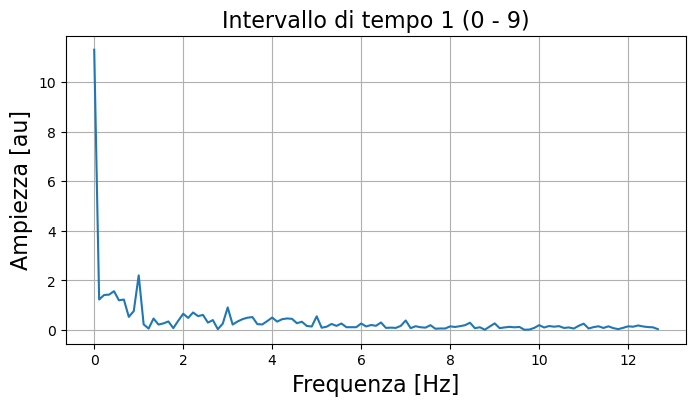

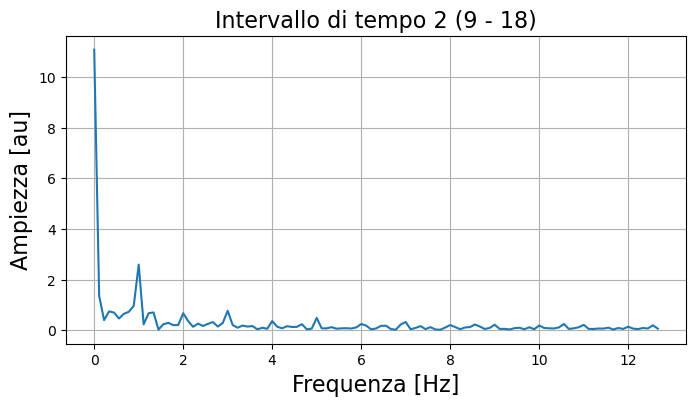

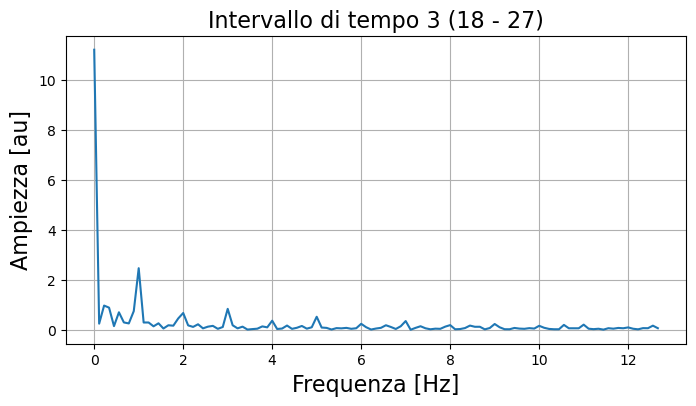

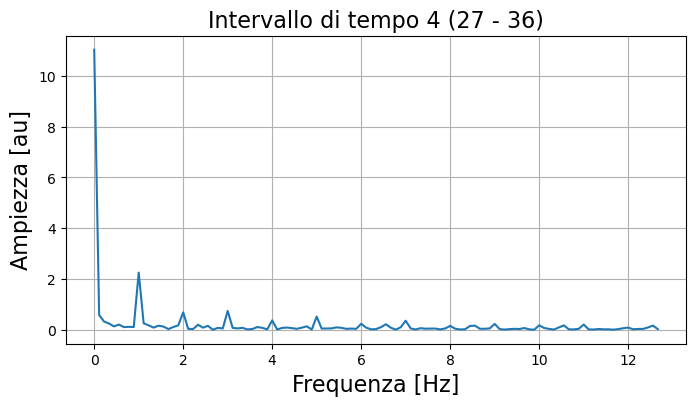

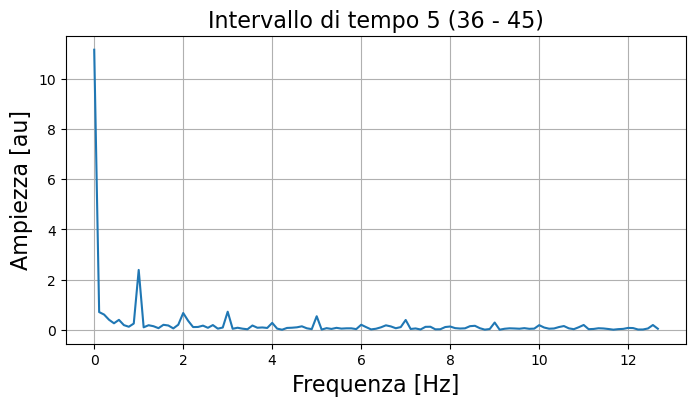

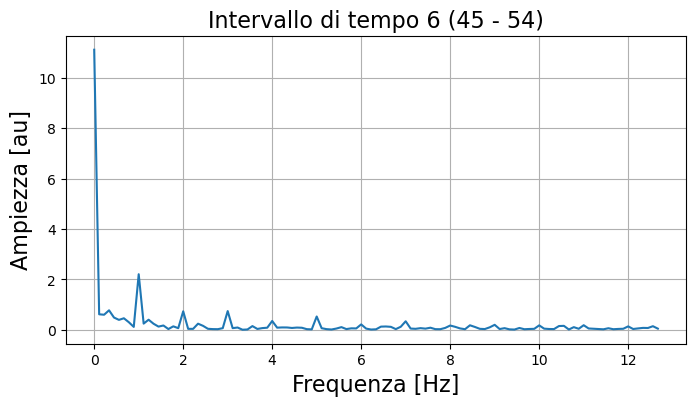

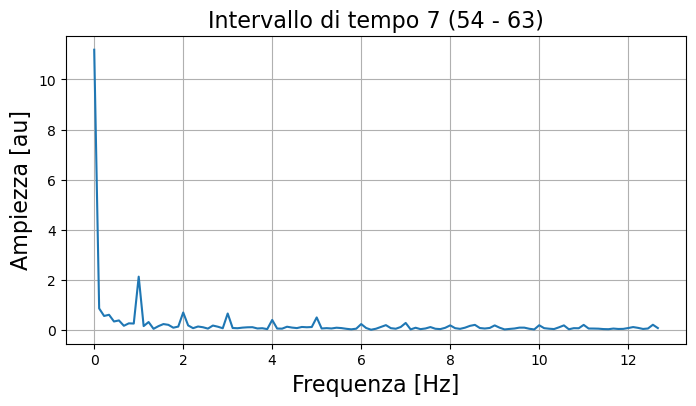

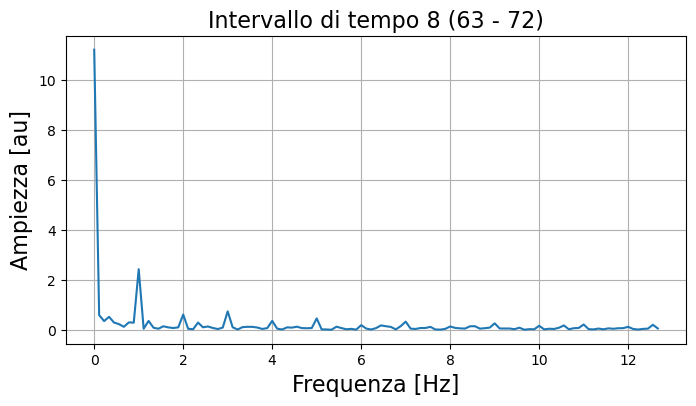

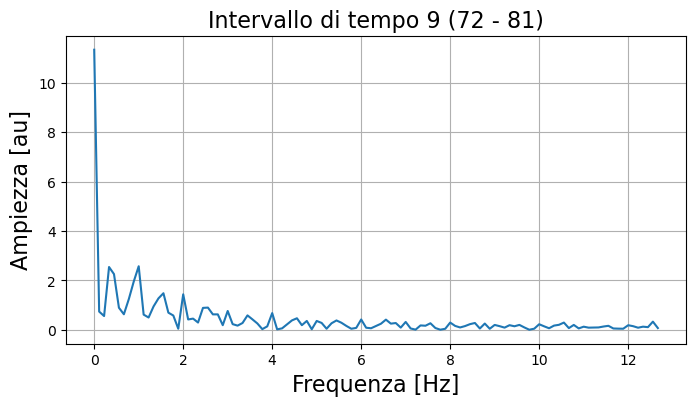

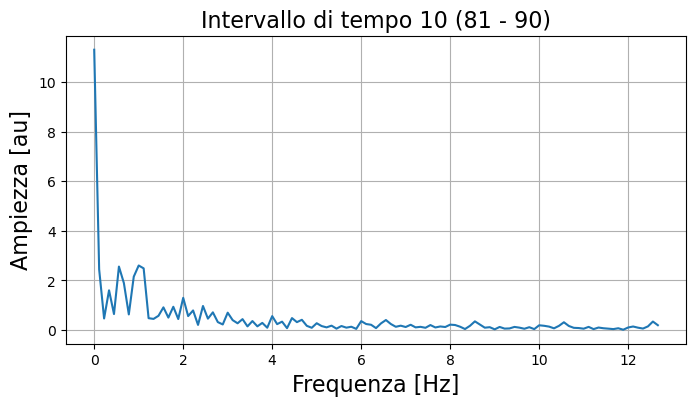

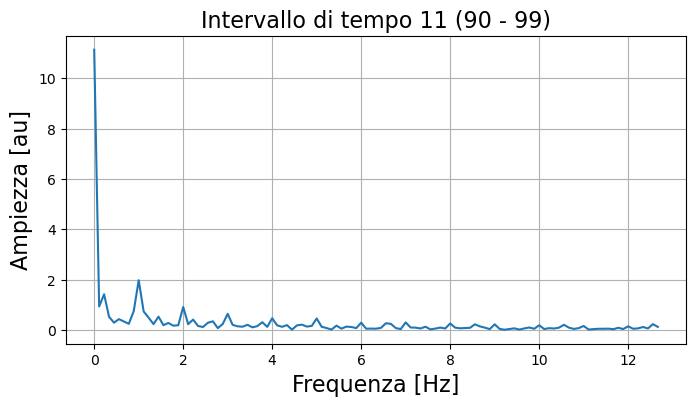

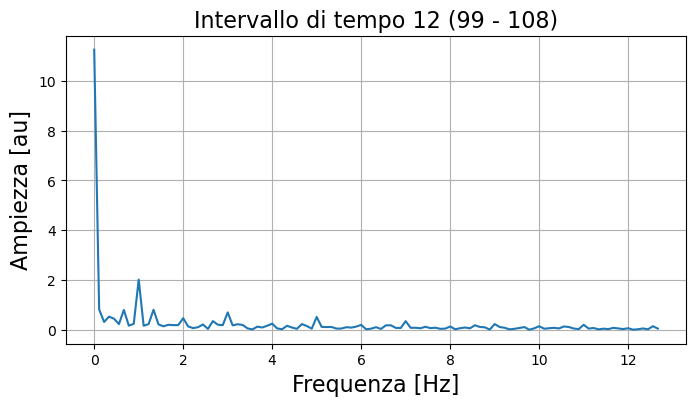

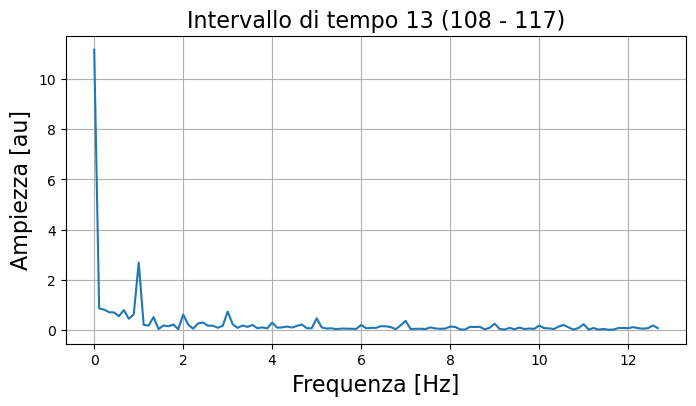

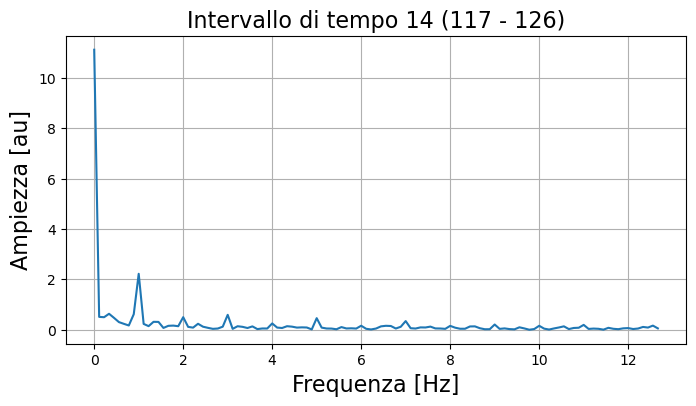

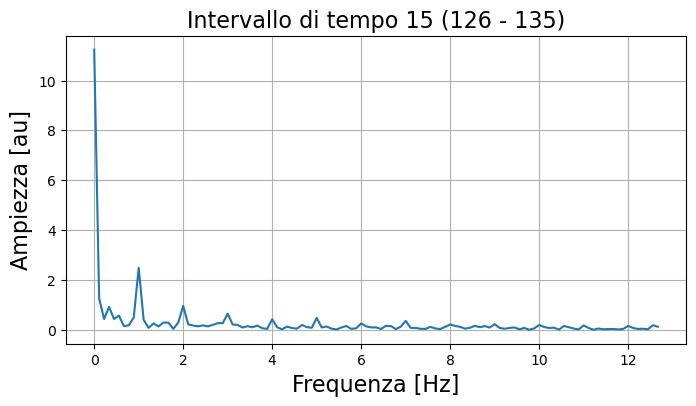

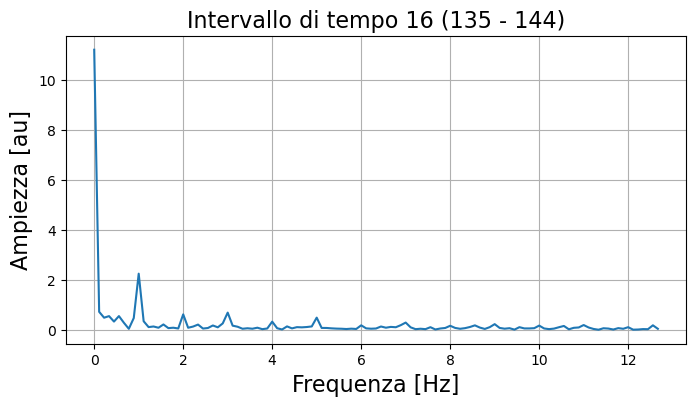

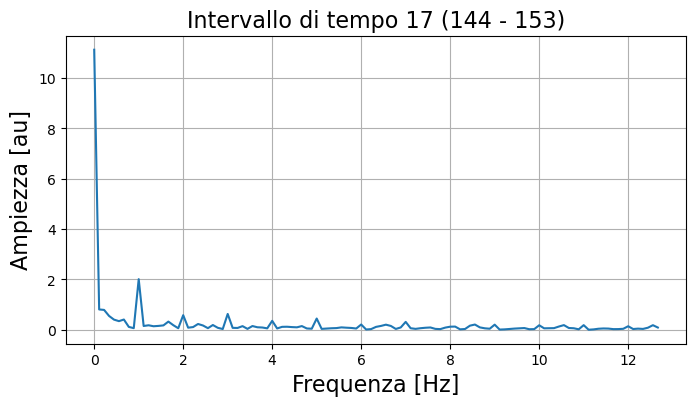

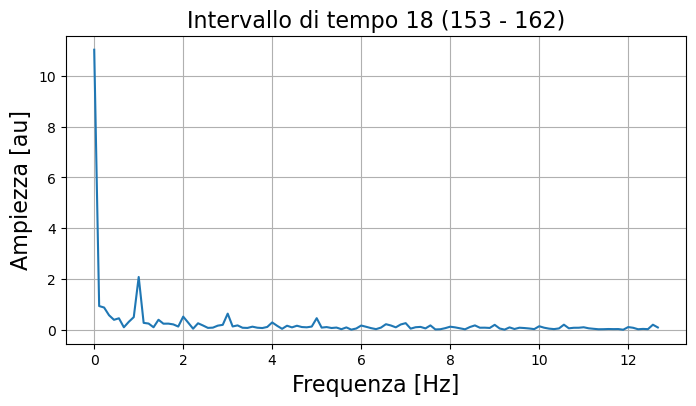

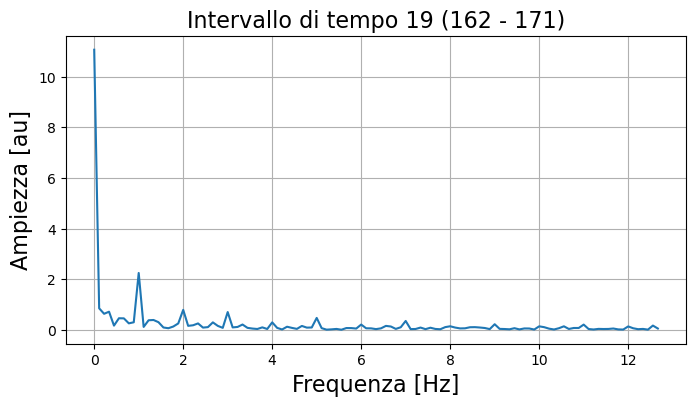

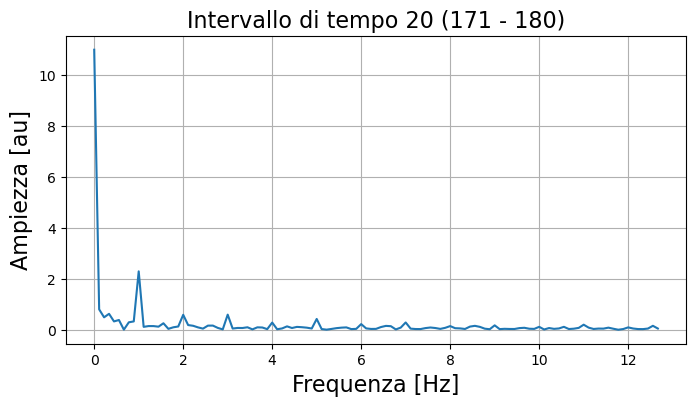

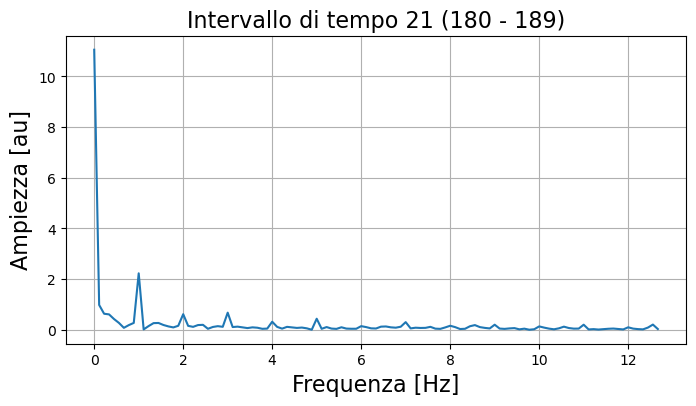

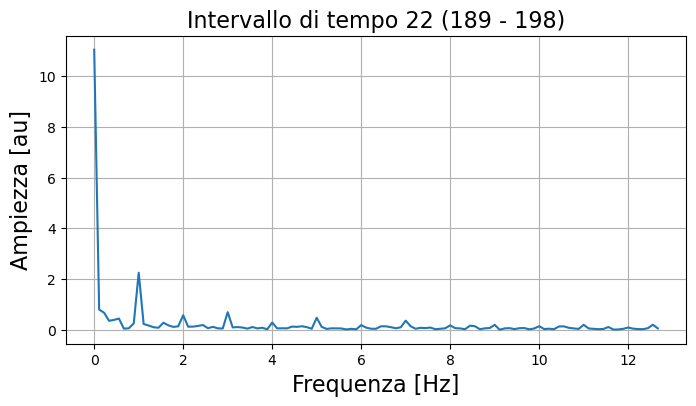

Media dei massimi valori di ampiezza tra 0 e 1 Hz: 0.4801529394324471
brpm 14.404588182973413
Media dei massimi valori di ampiezza tra 0.66 e 6.66 Hz: 0.5877517293109026
bpm 35.265103758654156


In [2]:
#downsampling FFT COMPLESSA
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from Lettura_Dati import leggi_file_COMPLESSI  # importo la funzione per leggere il file
from background_ds import Background_ds_COMPLESSA

file_path = "Desktop/Dati/ProveVere/Sense2GoL Pulse_record_20240530-155509.raw.txt"
frames = leggi_file_COMPLESSI(file_path)
frames_array = np.array(frames)

# Parametri
a=10 #fattore di downsampling
Nm = 9  # n di frame per blocco
T = 1 * Nm
N = (256 * Nm) // a
print(N)
bg =Background_ds_COMPLESSA(Nm,a)
background=np.array(bg)
print(background.shape)
# numero totale di finestre
total_windows = len(frames_array)//Nm

block_idx = 0
intervallo_tempo = 1

max_amplitudes_BRPM = []  #lista per memorizzare i respiri
max_amplitudes_BPM =[]  #lista per memorizzare il battito

# ciclo finché non raggiungo il numero totale di finestre
while intervallo_tempo <= total_windows:
    # idx inizio e fine del blocco
    start_idx = block_idx
    end_idx = block_idx + Nm

    block_frames = frames_array[start_idx:end_idx]
    block_frames=block_frames.flatten()
    block_frames=block_frames[::a] #prendo un valore ogni a
    # combino nm frames
    combined_fft = np.fft.fft(block_frames, n=N)
    # tolgo il background
    combined_fft_no_background = combined_fft[:N//2] - background[:N//2]
    # prendo solo le frequenze comprese tra 0 e 30 Hz
    xf = fftfreq(N, T/N)[:N//2]
    fft_amplitudes_selected = combined_fft_no_background[(xf > 0) & (xf <= 1)]
    # trovo l'indice del massimo valore di ampiezza
    max_amplitudes_BRPM_index = np.argmax(fft_amplitudes_selected)
    # aggiungo max
    max_amplitudes_BRPM.append(np.abs(fft_amplitudes_selected[max_amplitudes_BRPM_index]))

    #heartbeat
    fft_amplitudes_selected2 = combined_fft_no_background[(xf > 0.66) & (xf <= 6.66)]
    # trovo l'indice del massimo valore di ampiezza
    max_amplitudes_BPM_index = np.argmax(fft_amplitudes_selected2)
    # aggiungo max
    max_amplitudes_BPM.append(np.abs(fft_amplitudes_selected2[max_amplitudes_BPM_index]))
    # plot 
    plt.figure(figsize=(8, 4))
    plt.plot(xf, np.abs(combined_fft_no_background))
    plt.title(f'Intervallo di tempo {intervallo_tempo} ({start_idx} - {end_idx})',fontsize=16)
    plt.xlabel('Frequenza [Hz]',fontsize=16)
    plt.ylabel('Ampiezza [au]',fontsize=16)
    plt.grid(True)
    plt.show()

    block_idx += Nm
    intervallo_tempo += 1

# Calcola la media dei massimi valori di ampiezza

BRPM = np.mean(max_amplitudes_BRPM)
print("Media dei massimi valori di ampiezza tra 0 e 1 Hz:", BRPM)
print("brpm",(BRPM/2)*60)


BPM = np.mean(max_amplitudes_BPM)
print("Media dei massimi valori di ampiezza tra 0.66 e 6.66 Hz:", BPM)
print("bpm",BPM*60)